In [90]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

census = pd.read_csv('census_07_2022.csv')

census

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,0,1,Forgotten Gardens,Laura,White,56,Head,Married,Female,Unemployed,None,Christian
1,1,1,Forgotten Gardens,Elliot,White,57,Husband,Married,Male,"Education officer, community",None,Christian
2,2,1,Forgotten Gardens,Nicole,White,15,Daughter,NaN,Female,Student,None,NaN
3,3,2,Forgotten Gardens,Michelle,John,44,Head,Divorced,Female,"Administrator, arts",None,Christian
4,4,2,Forgotten Gardens,Jeffrey,John,9,Son,NaN,Male,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7768,7768,1,Fletcher Farmhouse,Beverley,Hudson,30,Head,Divorced,Female,"Research officer, trade union",None,Christian
7769,7769,1,Fletcher Farmhouse,Rachael,Hudson,0,Daughter,NaN,Female,Child,None,NaN
7770,7770,1,Fletcher Farmhouse,Stephen,Shepherd,54,Sibling,Divorced,Male,"Accountant, chartered public finance",None,None
7771,7771,1,Fletcher Farmhouse,William,French,48,Lodger,Single,Male,Unemployed,None,Christian


In [2]:
census = census.drop("Unnamed: 0", axis = 1)

In [3]:
census.isnull().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   1813
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         1863
dtype: int64

In [4]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7773 entries, 0 to 7772
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   7773 non-null   object
 1   Street                         7773 non-null   object
 2   First Name                     7773 non-null   object
 3   Surname                        7773 non-null   object
 4   Age                            7773 non-null   object
 5   Relationship to Head of House  7773 non-null   object
 6   Marital Status                 5960 non-null   object
 7   Gender                         7773 non-null   object
 8   Occupation                     7773 non-null   object
 9   Infirmity                      7773 non-null   object
 10  Religion                       5910 non-null   object
dtypes: object(11)
memory usage: 668.1+ KB


# Marital status has blank or missing values
## Age is showing as an object instead of integer 
## Religion has missing values 

In [5]:
Age = census['Age']
Religion = census['Religion']
Marital_Status = census['Marital Status']
Gender = census['Gender']
Occupation = census['Occupation']
Infirmity = census['Infirmity']
House_Number =  census['House Number']

Unique_Age = Age.unique()
Unique_Religion = Religion.unique()
Unique_Marital_Status = Marital_Status.unique()
Unique_Gender = Gender.unique()
Unique_Occupation = Occupation.unique()
Unique_Infirmity = Infirmity.unique()

In [6]:
print(Unique_Age)

['56' '57' '15' '44' '9' '72' '38' '5' '3' '41' '13' '73' '45' '36' '51'
 '23' '33' '4' '0' '30' '6' '2' '21' '28' '27' '83' '85' '19' '40' '16'
 '89' '65' '47' '20' '68' '66' '37' '32' '14' '10' '86' '69' '58' '22'
 '59' '63' '46' '39' '53' '42' '12' '8' '1' '24' '50' '26' '70' '54' '43'
 '60' '18' '11' '29' '76' '64' '34' '52' '35' '7' '48' '25' '75' '79' '71'
 '17' '49' '55' '74' '78' '31' '62' '67' '61' '72.38784457' '74.38784457'
 '84' '88' '80' '77' '81' '87' '101' '104' '82' '91' '102' '97' '90' '96'
 '98' '93' '103' '80.57582061' '77.57582061' '7.11E-15' '92' '105' '94'
 ' ' '99']


In [7]:
print(Unique_Religion)

['Christian' nan 'None' 'Catholic' 'Methodist' 'Muslim' 'Jewish' 'Sikh'
 'Buddist' 'Bahai' 'Sith' 'Private' 'Baptist' ' ' 'Orthodoxy']


In [8]:
print(Unique_Marital_Status)

['Married' nan 'Divorced' 'Widowed' 'Single' 'M' 'D' ' ' 'S' 'W']


In [9]:
Unique_Religion

array(['Christian', nan, 'None', 'Catholic', 'Methodist', 'Muslim',
       'Jewish', 'Sikh', 'Buddist', 'Bahai', 'Sith', 'Private', 'Baptist',
       ' ', 'Orthodoxy'], dtype=object)

In [10]:
print(Unique_Gender)

['Female' 'Male' 'female' 'M' 'm' 'f' 'F' 'male' ' ']


In [11]:
print(Unique_Occupation)

['Unemployed' 'Education officer, community' 'Student' ...
 'Retired Civil Service administrator'
 'Retired Research officer, government'
 'Retired Consulting civil engineer']


In [12]:
print(Unique_Infirmity)

['None' 'Unknown Infection' 'Blind' 'Disabled' ' ' 'Mental Disability'
 'Physical Disability' 'Deaf']


## Start of the data clean up for the age 

In [106]:
# Get the row number of value based on column
row_num = census[census['Age'] == ' '].index
print(row_num)

Int64Index([5998], dtype='int64')


In [107]:
#This gets the row where the cell belongs
census.loc[[5998]]

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5998,5998,40,Skylock Curve,Jodie,Clarke,,Daughter,NaN,Female,Child,None,NaN


In [108]:
census.at[5998, 'Age'] = '0'

In [109]:
census['Age'][5998]

'0'

In [110]:
census['Age'].isnull().values.any()

False

In [111]:
# census['Age'] = pd.to_numeric(census['Age'], downcast='integer')

In [112]:
census['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7773 entries, 0 to 7772
Series name: Age
Non-Null Count  Dtype 
--------------  ----- 
7773 non-null   object
dtypes: object(1)
memory usage: 60.9+ KB


In [113]:
# df = census.astype({"Age": int})

In [114]:
census['Age'] = pd.to_numeric(census['Age'], errors='coerce').astype(np.int64)


census['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7773 entries, 0 to 7772
Series name: Age
Non-Null Count  Dtype
--------------  -----
7773 non-null   int64
dtypes: int64(1)
memory usage: 60.9 KB


In [115]:
census['Age'].unique()

array([ 56,  57,  15,  44,   9,  72,  38,   5,   3,  41,  13,  73,  45,
        36,  51,  23,  33,   4,   0,  30,   6,   2,  21,  28,  27,  83,
        85,  19,  40,  16,  89,  65,  47,  20,  68,  66,  37,  32,  14,
        10,  86,  69,  58,  22,  59,  63,  46,  39,  53,  42,  12,   8,
         1,  24,  50,  26,  70,  54,  43,  60,  18,  11,  29,  76,  64,
        34,  52,  35,   7,  48,  25,  75,  79,  71,  17,  49,  55,  74,
        78,  31,  62,  67,  61,  84,  88,  80,  77,  81,  87, 101, 104,
        82,  91, 102,  97,  90,  96,  98,  93, 103,  92, 105,  94,  99])

In [116]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7773 entries, 0 to 7772
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     7773 non-null   int64 
 1   House Number                   7773 non-null   object
 2   Street                         7773 non-null   object
 3   First Name                     7773 non-null   object
 4   Surname                        7773 non-null   object
 5   Age                            7773 non-null   int64 
 6   Relationship to Head of House  7773 non-null   object
 7   Marital Status                 5960 non-null   object
 8   Gender                         7773 non-null   object
 9   Occupation                     7773 non-null   object
 10  Infirmity                      7773 non-null   object
 11  Religion                       5910 non-null   object
dtypes: int64(2), object(10)
memory usage: 728.8+ KB


In [117]:
census['Age'].describe()

count    7773.000000
mean       36.501351
std        21.837529
min         0.000000
25%        19.000000
50%        36.000000
75%        52.000000
max       105.000000
Name: Age, dtype: float64

## Religion Cleanup

In [25]:
census['Religion'].unique()

array(['Christian', nan, 'None', 'Catholic', 'Methodist', 'Muslim',
       'Jewish', 'Sikh', 'Buddist', 'Bahai', 'Sith', 'Private', 'Baptist',
       ' ', 'Orthodoxy'], dtype=object)

In [26]:
rel_row_num = census[census['Religion'] == ' '].index
print(rel_row_num)

Int64Index([6389, 6902, 7260], dtype='int64')


In [27]:
census.loc[[6389]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6389,5,Wilkins Street,Catherine,Hargreaves,45,Head,Divorced,female,"Engineer, communications",None,


In [28]:
census[(census['House Number'] == '5') & (census['Street'] == 'Wilkins Street') & (census['Surname'] == 'Hargreaves')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6389,5,Wilkins Street,Catherine,Hargreaves,45,Head,Divorced,female,"Engineer, communications",None,
6390,5,Wilkins Street,Lee,Hargreaves,3,Son,NaN,Male,Child,None,NaN


In [29]:
census.at[6389, 'Religion'] = 'None'
census.at[6390, 'Religion'] = 'None'

In [30]:
census.loc[[6902]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6902,31,Cottingham Drive,Ellie,Newton,11,Daughter,NaN,Female,Student,None,


In [31]:
census[(census['House Number'] == '31') & (census['Street'] == 'Cottingham Drive')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6898,31,Cottingham Drive,Leigh,Newton,50,Head,Married,Male,Prison officer,None,Christian
6899,31,Cottingham Drive,Stephanie,Newton,48,Wife,Married,Female,"Civil engineer, contracting",None,Christian
6900,31,Cottingham Drive,Anna,Newton,16,Daughter,NaN,Female,Student,None,NaN
6901,31,Cottingham Drive,Leonard,Newton,12,Son,NaN,Male,Student,None,NaN
6902,31,Cottingham Drive,Ellie,Newton,11,Daughter,NaN,Female,Student,None,


In [32]:
census.at[6902, 'Religion'] = 'None'
census.at[6902, 'Religion']

'None'

In [33]:
census.loc[[7260]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7260,13,Monument Lodge,Brenda,Shaw,22,Daughter,Single,Female,University Student,None,


In [34]:
census[(census['House Number'] == '13') & (census['Street'] == 'Monument Lodge')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7259,13,Monument Lodge,Bruce,Shaw,53,Head,Divorced,Male,Corporate treasurer,None,Christian
7260,13,Monument Lodge,Brenda,Shaw,22,Daughter,Single,Female,University Student,None,


In [35]:
census.at[7260, 'Religion'] = 'None'
census.at[7260, 'Religion'] 

'None'

In [36]:
census['Religion'].unique()

array(['Christian', nan, 'None', 'Catholic', 'Methodist', 'Muslim',
       'Jewish', 'Sikh', 'Buddist', 'Bahai', 'Sith', 'Private', 'Baptist',
       'Orthodoxy'], dtype=object)

In [37]:
census['Religion'].fillna('None', inplace = True)

In [38]:
census['Religion'].unique()

array(['Christian', 'None', 'Catholic', 'Methodist', 'Muslim', 'Jewish',
       'Sikh', 'Buddist', 'Bahai', 'Sith', 'Private', 'Baptist',
       'Orthodoxy'], dtype=object)

##  House number

In [39]:
census['House Number'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', 'One', '102', '103', '104', '105', '106', '107', '108',
       '109', '110', '111', '112', '113', '114', '115', '116', '117',
       '118', '119', '120', '121', '122', '123', '124', '125', '126',
       '127', '128', '129', '130', '131', '132', '133', '134', '135',
       '136', '137', '138', '139', '140', '141', '142', '143', '1

In [40]:
house_number_update = census[census['House Number'] == 'One'].index
print(house_number_update)

Int64Index([471], dtype='int64')


In [41]:
census['House Number'].replace('One', '1', inplace = True)

In [42]:
census['House Number'][471]

'1'

In [43]:
census['House Number'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144', '1

In [44]:
census['House Number'] = pd.to_numeric(census['House Number']).astype(np.int64)
census['House Number'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7773 entries, 0 to 7772
Series name: House Number
Non-Null Count  Dtype
--------------  -----
7773 non-null   int64
dtypes: int64(1)
memory usage: 60.9 KB


In [45]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7773 entries, 0 to 7772
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   7773 non-null   int64 
 1   Street                         7773 non-null   object
 2   First Name                     7773 non-null   object
 3   Surname                        7773 non-null   object
 4   Age                            7773 non-null   int64 
 5   Relationship to Head of House  7773 non-null   object
 6   Marital Status                 5960 non-null   object
 7   Gender                         7773 non-null   object
 8   Occupation                     7773 non-null   object
 9   Infirmity                      7773 non-null   object
 10  Religion                       7773 non-null   object
dtypes: int64(2), object(9)
memory usage: 668.1+ KB


## Relationship to head of house cleanup

In [46]:
census['Relationship to Head of House'].unique()

array(['Head', 'Husband', 'Daughter', 'Son', 'None', 'Wife', 'Partner',
       'Lodger', 'Sibling', 'Visitor', 'Cousin', 'Adopted Son',
       'Granddaughter', 'Grandson', 'Adopted Daughter', 'Step-Son',
       'Step-Daughter', 'Neice', 'Nephew', 'Adopted Granddaughter', ' '],
      dtype=object)

In [45]:
row_index =census[census['Relationship to Head of House'] == ' '].index
print(row_index)

Int64Index([2240], dtype='int64')


In [46]:
census.loc[[2240]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2240,19,Norwich Cliffs,Emily,Hill,19,,Single,Female,University Student,None,None


In [47]:
census[(census['House Number'] == 19) & (census['Street'] == 'Norwich Cliffs')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [48]:
# Looking at this column they are around the same age range and have nothing really in common.
#This signifies that they live in a shared apartment.

census['Relationship to Head of House'].replace(' ', 'None', inplace = True)

census['Relationship to Head of House'].unique()

array(['Head', 'Husband', 'Daughter', 'Son', 'None', 'Wife', 'Partner',
       'Lodger', 'Sibling', 'Visitor', 'Cousin', 'Adopted Son',
       'Granddaughter', 'Grandson', 'Adopted Daughter', 'Step-Son',
       'Step-Daughter', 'Neice', 'Nephew', 'Adopted Granddaughter'],
      dtype=object)

## Marital Status Cleanup

In [49]:
Unique_Marital_Status

array(['Married', nan, 'Divorced', 'Widowed', 'Single', 'M', 'D', ' ',
       'S', 'W'], dtype=object)

In [50]:
ms_index = census[census['Marital Status'] == ' '].index
print(ms_index)

Int64Index([819], dtype='int64')


In [51]:
census.loc[[819]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
819,31,Newfound Drive,Hilary,Morgan,22,Daughter,,Female,University Student,None,None


In [52]:
#Code to get the mode of the occupation of the students 
for column in census['Occupation']:
    if column == 'University Student':
        x = census['Marital Status'].mode()

print(x)

0    Single
Name: Marital Status, dtype: object


In [53]:
census['Marital Status'].replace(' ', 'Single', inplace = True)

census['Marital Status'].unique()

array(['Married', nan, 'Divorced', 'Widowed', 'Single', 'M', 'D', 'S',
       'W'], dtype=object)

In [54]:
for column in census['Marital Status']:
    if column == 'D':
        census['Marital Status'] = census['Marital Status'].replace('D', 'Divorced')
    elif column == 'M':
        census['Marital Status'] = census['Marital Status'].replace('M', 'Married')
    elif column == 'S':
        census['Marital Status'] = census['Marital Status'].replace('S', 'Single')
    elif column == 'W':
        census['Marital Status'] = census['Marital Status'].replace('W', 'Widowed')

In [55]:
census['Marital Status'].unique()

array(['Married', nan, 'Divorced', 'Widowed', 'Single'], dtype=object)

## Gender Cleanup


In [56]:
Unique_Gender

array(['Female', 'Male', 'female', 'M', 'm', 'f', 'F', 'male', ' '],
      dtype=object)

In [57]:
#Here we will be going with two conventions Male and Female
for column in census['Gender']:
    if column == 'female':
        census['Gender'] = census['Gender'].replace('female', 'Female')
    elif column == 'male':
        census['Gender'] = census['Gender'].replace('male', 'Male')
    elif column == 'M':
        census['Gender'] = census['Gender'].replace('M', 'Male')
    elif column == 'm':
        census['Gender'] = census['Gender'].replace('m', 'Male')
    elif column == 'f':
        census['Gender'] = census['Gender'].replace('f', 'Female')
    elif column == 'F':
        census['Gender'] = census['Gender'].replace('F', 'Female')

In [58]:
census['Gender'].unique()

array(['Female', 'Male', ' '], dtype=object)

In [59]:
census[census['Gender'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5394,13,Simpson Flats,Antony,Welch-Martin,61,Husband,Married,,"Psychologist, prison and probation services",None,Catholic


In [60]:
census[(census['House Number'] == 13 ) & (census['Street'] == 'Simpson Flats')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [61]:
#looking at the first name (Antony) and relationship to head (Husband) we can deduce that gender is Male


census['Gender'].replace(' ', 'Male', inplace = True)

census['Gender'].unique()

array(['Female', 'Male'], dtype=object)

## Occupation cleanup

In [62]:
Unique_Occupation

array(['Unemployed', 'Education officer, community', 'Student', ...,
       'Retired Civil Service administrator',
       'Retired Research officer, government',
       'Retired Consulting civil engineer'], dtype=object)

In [63]:
census[census['Occupation'] == ' '].index

Int64Index([949], dtype='int64')

In [64]:
census.loc[[949]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
949,16,Newfound Creek,Danielle,Wood,70,Head,Single,Female,,None,Christian


In [65]:
census[(census['House Number'] == 16) & (census['Street'] == 'Newfound Creek')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [66]:
census['Occupation'].replace(' ', 'Retired', inplace = True)

## Infirmity

In [67]:
Unique_Infirmity

array(['None', 'Unknown Infection', 'Blind', 'Disabled', ' ',
       'Mental Disability', 'Physical Disability', 'Deaf'], dtype=object)

In [68]:
census[census['Infirmity'] == ' '].index

Int64Index([430, 509, 2012, 2818, 6208, 6642], dtype='int64')

In [69]:
# fill with None

In [70]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7773 entries, 0 to 7772
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   7773 non-null   object
 1   Street                         7773 non-null   object
 2   First Name                     7773 non-null   object
 3   Surname                        7773 non-null   object
 4   Age                            7773 non-null   int64 
 5   Relationship to Head of House  7773 non-null   object
 6   Marital Status                 5960 non-null   object
 7   Gender                         7773 non-null   object
 8   Occupation                     7773 non-null   object
 9   Infirmity                      7773 non-null   object
 10  Religion                       7773 non-null   object
dtypes: int64(1), object(10)
memory usage: 668.1+ KB


In [92]:
import seaborn as sns


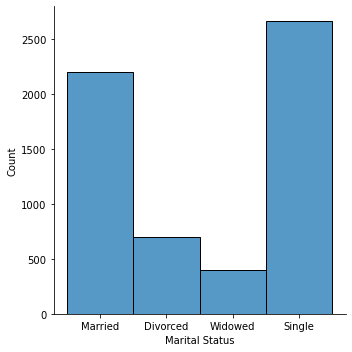

In [72]:
sns.displot(data=census, x = 'Marital Status', bins =30)

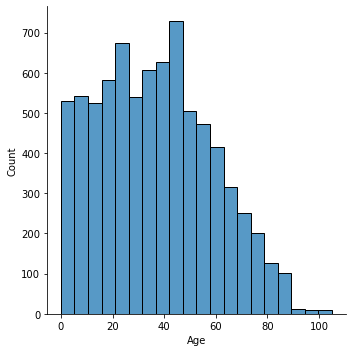

In [73]:
sns.displot(data=census, x = 'Age', bins =20)

In [74]:
male_data = census[(census['Age']) & (census['Gender'] == 'Male')]

male_data

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1,1,Forgotten Gardens,Elliot,White,57,Husband,Married,Male,"Education officer, community",None,Christian
4,2,Forgotten Gardens,Jeffrey,John,9,Son,NaN,Male,Student,None,None
7,4,Forgotten Gardens,Gerard,Mills,5,Son,NaN,Male,Student,None,None
9,4,Forgotten Gardens,Leslie,Jones,3,Son,NaN,Male,Child,None,None
11,5,Forgotten Gardens,Rhys,Conway,41,Husband,Married,Male,Unemployed,None,None
...,...,...,...,...,...,...,...,...,...,...,...
7743,1,Cancer Palace,Geoffrey,Ferguson,13,Son,NaN,Male,Student,None,None
7749,1,Matthews Rectory,Keith,Hayes,25,Lodger,Single,Male,"Programmer, systems",None,Christian
7755,1,Temple Rectory,Henry,Jenkins,41,Son,Single,Male,"Restaurant manager, fast food",None,None
7757,1,Temple Rectory,Ashley,Jenkins,37,Son,Single,Male,Broadcast presenter,None,Christian


In [75]:
def check_male(data):
    for i in census['Gender']:
        if i == 'Male':
            x = census['Age']
    
print(check_male(x))

None


In [76]:
group = census.groupby(['Age', 'Gender']).sum()

group

House Number  \
Age Gender                                                      
0   Female      722261566723487161410618323606722592440748111   
    Male    8172714381835673202538530128159252161362445343...   
1   Female  2206253715183172552212512192546141178189189235...   
    Male    3864041512372626153131520288431111172735978951...   
2   Female  9963858617313187191914251363929971431472148263...   
...                                                       ...   
102 Male                                                   14   
103 Female                                                 27   
104 Female                                                521   
    Male                                                    7   
105 Male                                                   41   

                                                       Street  \
Age Gender                                                      
0   Female  Fish HarborPillar AvenueHiggins BurgsBarbican ...   
    Male    Forgotten GardensQuayside DriveFish HarborFish...   
1   Female  Fish HarborFish HarborMatthews RiverThomas Bro...   
    Male    Fish HarborMatthews RiverOaktree RoadOaktree R...   
2   Female  Forgotten GardensForgotten GardensFish HarborF...   
...                                                       ...   
102 Male                                          Kraken Road   
103 Female                                        Khan Valley   
104 Female                        Aprildraw AvenueKraken Road   
    Male                                        Higgins Burgs   
105 Male                                       Kielder Avenue   

                                                   First Name  \
Age Gender                                                      
0   Female  LynnBethanyJemmaKimberleyLynneJaniceHelenAngel...   
    Male    HarryDouglasDenisDavidRhysBenjaminJamesBarrySt...   
1   Female  AmeliaKayleighBeverleyDanielleAmandaCaroleSall...   
    Male    DuncanDennisStephenJamesAllanAdrianJohnOliverD...   
2   Female  DanielleMaureenSylviaRosieLindseyElaineDianaJo...   
...                                                       ...   
102 Male                                              Dominic   
103 Female                                           Rosemary   
104 Female                                       BrendaTeresa   
    Male                                              Patrick   
105 Male                                                  Jay   

                                                      Surname  \
Age Gender                                                      
0   Female  TurnbullWrightSmithGregoryThomsonShepherdWalli...   
    Male    Fletcher-CoxChapman-DavisDaviesStoneHillMorris...   
1   Female  DaviesWilsonFinch-TaylorKingOliverKempCraigMar...   
    Male    WoodFinch-TaylorMooreHallHarrisHopkinsOliverPa...   
2   Female  RobinsonRobinsonHartleyWebbDaviesWatersBaileyB...   
...                                                       ...   
102 Male                                                Moore   
103 Female                                             Thomas   
104 Female                                            CoxDean   
    Male                                                Ellis   
105 Male                                             Harrison   

                                Relationship to Head of House  \
Age Gender                                                      
0   Female  DaughterDaughterDaughterGranddaughterDaughterD...   
    Male    SonSonSonSonSonSonStep-SonSonSonSonSonSonSonSo...   
1   Female  DaughterDaughterDaughterDaughterDaughterDaught...   
    Male    SonSonSonSonSonSonSonSonSonSonSonSonSonSonSonS...   
2   Female  DaughterDaughterDaughterDaughterDaughterStep-D...   
...                                                       ...   
102 Male                                                 Head   
103 Female                                               Head   
104 Female     

In [77]:
census

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Forgotten Gardens,Laura,White,56,Head,Married,Female,Unemployed,None,Christian
1,1,Forgotten Gardens,Elliot,White,57,Husband,Married,Male,"Education officer, community",None,Christian
2,1,Forgotten Gardens,Nicole,White,15,Daughter,NaN,Female,Student,None,None
3,2,Forgotten Gardens,Michelle,John,44,Head,Divorced,Female,"Administrator, arts",None,Christian
4,2,Forgotten Gardens,Jeffrey,John,9,Son,NaN,Male,Student,None,None
...,...,...,...,...,...,...,...,...,...,...,...
7768,1,Fletcher Farmhouse,Beverley,Hudson,30,Head,Divorced,Female,"Research officer, trade union",None,Christian
7769,1,Fletcher Farmhouse,Rachael,Hudson,0,Daughter,NaN,Female,Child,None,None
7770,1,Fletcher Farmhouse,Stephen,Shepherd,54,Sibling,Divorced,Male,"Accountant, chartered public finance",None,None
7771,1,Fletcher Farmhouse,William,French,48,Lodger,Single,Male,Unemployed,None,Christian


In [93]:
# percentile list
perc =[.20, .40, .60, .80]
  
# list of dtypes to include
include =['object', 'float', 'int']

mc = census['Marital Status'].describe(percentiles = perc, include = include)

mc

count       5960
unique         4
top       Single
freq        2662
Name: Marital Status, dtype: object

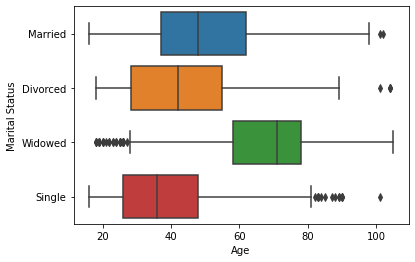

In [104]:
from matplotlib import pyplot as plt
sns.boxplot(data=census, x="Age", y="Marital Status" )
plt.show()

In [117]:
for column in census['Gender']:
    if column == 'Male':
        x = census['Age']
        

print(x)
        
    


# male_data = census[(census['Gender'] == 'Male')]



0       56
1       57
2       15
3       44
4        9
        ..
7768    30
7769     0
7770    54
7771    48
7772    34
Name: Age, Length: 7773, dtype: int64


## Creating the Age Pyramid

In [166]:
census['Age Range'] = pd.cut(census.Age, bins = [0,4,9,14,19,24,29,34,39,44,49,54,59,64,69,74,79,84,89,94,99,100])
# labels = ['0-4','5-9', '10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-84','85-89','90-94','95-99','100+']

In [167]:
#Grouping the dataset by gender i.e Male and Female
Male = census[(census['Gender'] == 'Male')]
Female = census[(census['Gender'] == 'Female')]

General = census['Gender']

In [168]:
#Age counts based on the Age range for Male
Male_count = Male['Age Range'].value_counts()
Male_count = list(-Male_count)
Male_count.reverse()
#Age counts based on the Age range for Female
Female_count = Female['Age Range'].value_counts()
Female_count = list(Female_count)
Female_count.reverse()


# General_count = General['Age Range'].value_counts()
# General_count = list(General_count)
# General_count.reverse()
Age_bins = ['0-4','5-9', '10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-84','85-89','90-94','95-99','100+']
Age_bins.reverse()

In [169]:
print (Age_bins)

['100+', '95-99', '90-94', '85-89', '80-84', '75-79', '70-74', '65-69', '60-64', '55-59', '50-54', '45-49', '40-44', '35-39', '30-34', '25-29', '20-24', '15-19', '10-14', '5-9', '0-4']


In [170]:
print (general)

[-3, -5, -7, -38, -54, -80, -98, -99, -175, -192, -202, -216, -244, -246, -248, -250, -262, -272, -273, -282, -288, 4, 5, 5, 35, 66, 93, 138, 142, 166, 172, 209, 225, 242, 256, 270, 271, 275, 281, 315, 324, 369]


In [171]:
print (Female_count)


[0, 5, 5, 35, 66, 93, 138, 142, 166, 172, 209, 225, 242, 256, 270, 271, 275, 281, 315, 324, 369]


In [172]:
print (Male_count)

[0, -5, -7, -38, -54, -80, -98, -99, -175, -192, -202, -216, -244, -246, -248, -250, -262, -272, -273, -282, -288]


In [173]:
pyramid_table = pd.DataFrame({'Age_bins': Age_bins, 'Male': Male_count, 'Female': Female_count,})

In [174]:
pyramid_table

,Age_bins,Male,Female
0,100+,0,0
1,95-99,-5,5
2,90-94,-7,5
3,85-89,-38,35
4,80-84,-54,66
5,75-79,-80,93
6,70-74,-98,138
7,65-69,-99,142
8,60-64,-175,166
9,55-59,-192,172


Text(0.5, 1.0, 'Age Pyramid')

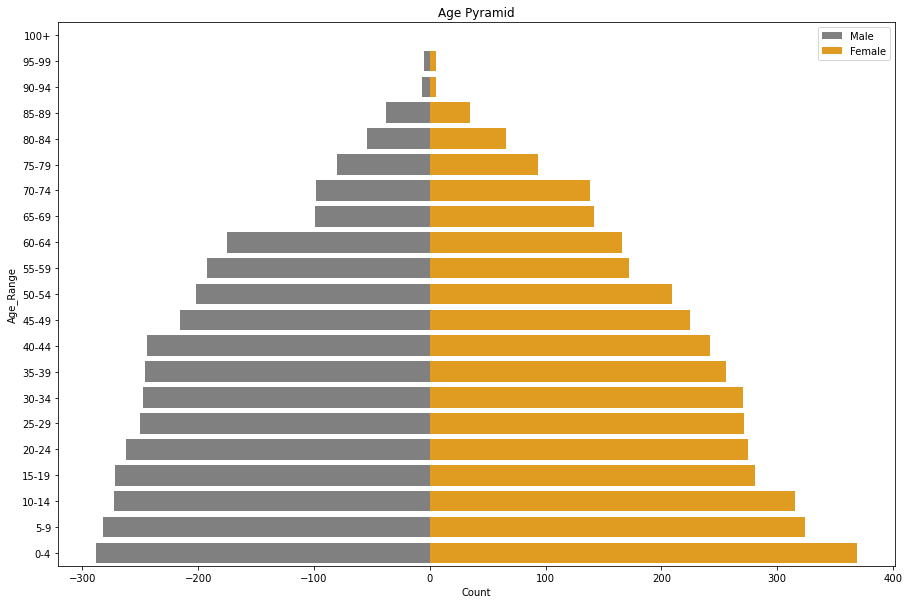

In [175]:
plt.figure(figsize = (15,10))
pyramid_plot = sns.barplot(x ='Male', y = 'Age_bins', data = pyramid_table, color=('gray'), label = 'Male')
pyramid_plot = sns.barplot(x = 'Female', y = 'Age_bins', data = pyramid_table, color=('orange'), label = 'Female')
pyramid_plot.legend()
pyramid_plot.set(xlabel = 'Count', ylabel = 'Age_Range')
plt.title ('Age Pyramid')

In [176]:
child = census[(census['Occupation'] == 'Child')]

child.count()

Unnamed: 0                       433
House Number                     433
Street                           433
First Name                       433
Surname                          433
Age                              433
Relationship to Head of House    433
Marital Status                     0
Gender                           433
Occupation                       433
Infirmity                        433
Religion                           0
Age Range                        373
dtype: int64

In [ ]:
cen